In [13]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from itertools import product

In [9]:
models = ['resnet', 'lenet']
da_techniques = ['adda', 'afn', 'bsp', 'dann', 'mdd', 'source_only']

In [8]:
base_path = '../data/06_models'

In [16]:
umaps = {}
for model, da_technique in product(models, da_techniques):
    umaps[(model, da_technique)] = pd.read_parquet(f"{base_path}/{da_technique}/{model}/umap.parquet")

In [17]:
umaps[("resnet", "source_only")]

,0,1,label
0,-2.521523,-10.384142,MNIST
1,-0.893573,10.802982,MNIST
2,5.645449,14.151912,MNIST
3,-5.064533,-5.685894,MNIST
4,9.940063,-4.683794,MNIST
...,...,...,...
18427,6.195320,-3.391421,TDS
18428,6.487781,-4.392662,TDS
18429,6.683039,-3.705060,TDS
18430,8.674559,-3.998817,TDS


In [31]:
def plot(model, da_technique):
    df_model_da = umaps[(model, da_technique)]
    df_mnist = df_model_da.query("label == 'MNIST'")
    df_tds = df_model_da.query("label == 'TDS'")

    fig, ax = plt.subplots(figsize=(7,7))
    ax.scatter(df_mnist['0'], df_mnist['1'], label='MNIST', alpha=0.5, s=0.5)
    ax.scatter(df_tds['0'], df_tds['1'], label='TDS', alpha=0.5, s=0.5)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.legend()
    plt.show()

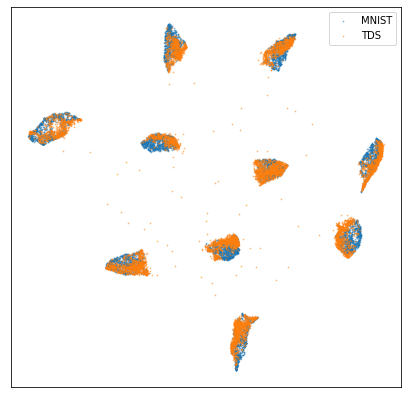

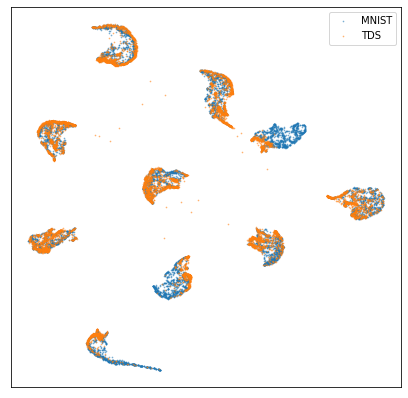

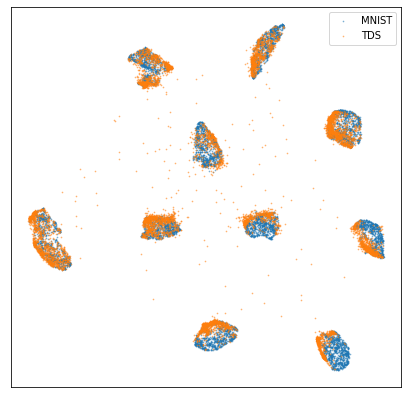

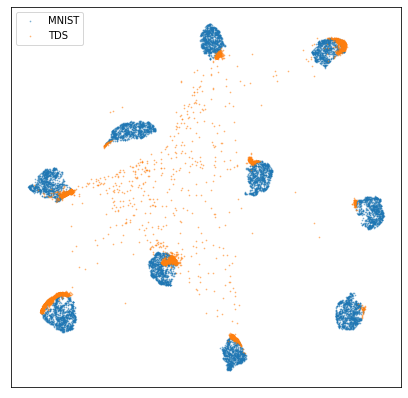

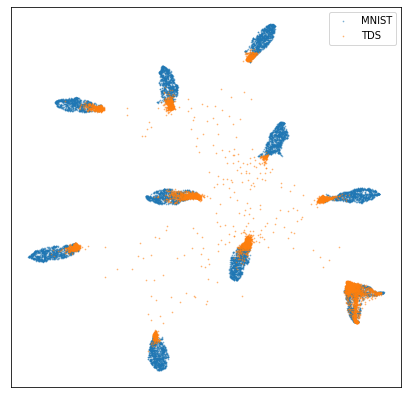

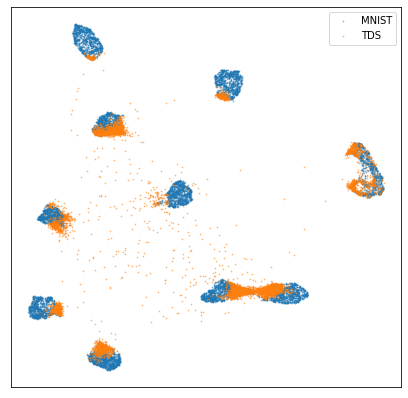

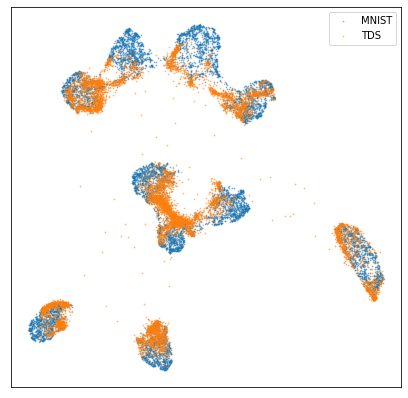

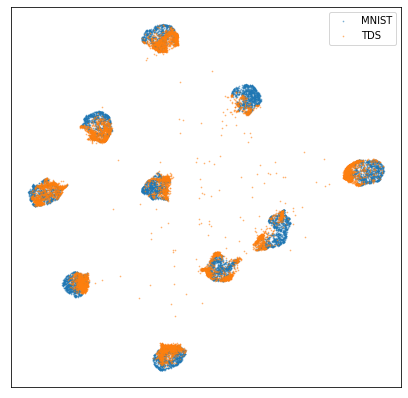

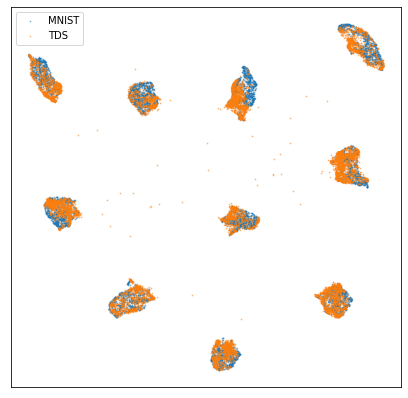

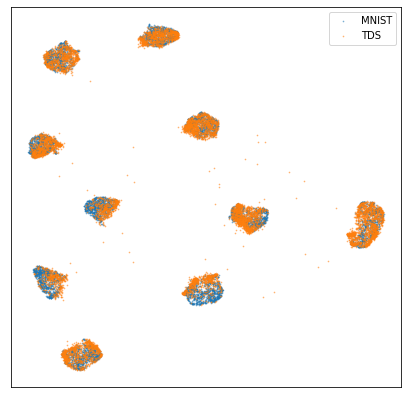

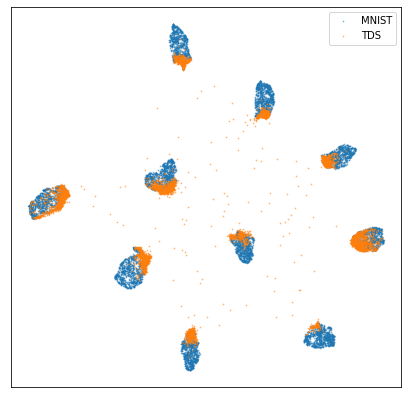

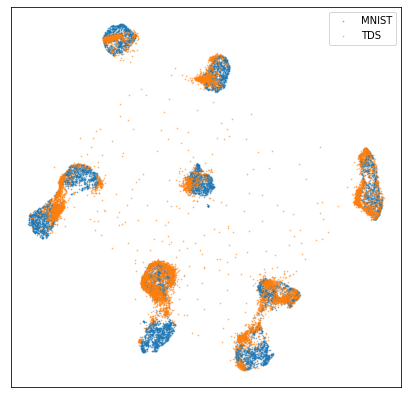

In [34]:
for model, da_technique in product(models, da_techniques):
    plot(model, da_technique)